In [6]:
using Images
using Color

In [167]:
w = 30;
dir = "/home/eric/NeuralNets/images/orient30/"

"/home/eric/NeuralNets/images/orient30/"

In [168]:
thetas = 0:(π/180):2π;

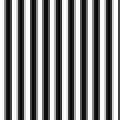

In [169]:
x = [1:2w]'
freq=30
srcData = repmat(min(.5*(sin(x/w*freq)+1.4),1),2w,1)
srcImg = convert(Image{RGB},srcData)

In [172]:
# generate oriented bars for each
# 180 degree rotation for these images = 0 degree rotation, so the other pi degrees rotation
# are redundant
for d=0:179
    θ=π*d/180
    R = [cos(θ) -sin(θ); sin(θ) cos(θ)]
    data = zeros(w,w)
    R = [cos(θ) -sin(θ); sin(θ) cos(θ)]
    # move w*w square at origin, rotate each x,y to obtain new normalized coordinate
    x = repmat(1:w,1,w)
    y = repmat([1:w]',w,1)
    xy = [x[:]' ; y[:]']
    pxy = R*(xy-w/2) # move to origin, then rotate
    xy_src = int(round(pxy+w)) # translate to center of srcImg, determine overlapping indices
    for i=1:size(xy,2)
        c_t,r_t = xy[:,i]
        c_s,r_s = xy_src[:,i]
        data[r_t,c_t]=srcData[r_s,c_s]
    end
    img = convert(Image{RGB},data)
    imwrite(img,string(dir,"$d.jpg"))
end

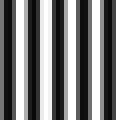

In [171]:
img

In [149]:
# data = zeros(w,w,3)
# data[:,:,:] = ones(w,w)
# img = convert(Image{RGB}, data)
